# Генетический алгоритм: поиск минимума функции на отрезке

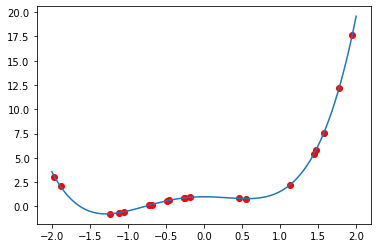

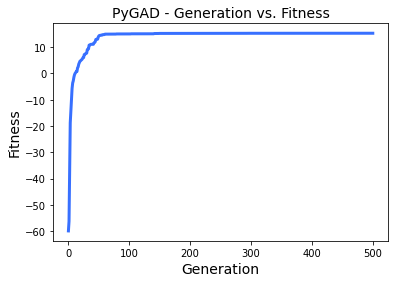

Parameters of the best solution : [-1.27526107 -1.30477874 -1.2966859  -1.27405769 -1.27286668 -1.26723852
 -1.2718011  -1.3078431  -1.2844286  -1.29455645 -1.2970544  -1.30638942
 -1.26435284 -1.25557942 -1.28650804 -1.29859643 -1.30780589 -1.27625123
 -1.2700188  -1.27727161]
Fitness value of the best solution = 15.26738731279468
ymin =  -0.7641624395915269


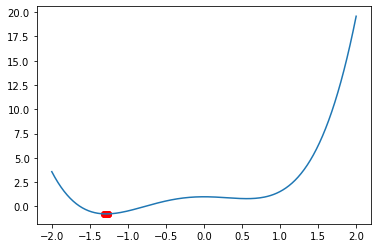

In [32]:
import pygad
import numpy
import matplotlib.pyplot as plt
import random
import math

POP_SIZE = 50
POINT_NUM = 20
GEN_NUM = 500


function = input(('y(x) = ')) #вводим функцию от одной переменной, пример: x**4 + x**3 - x**2 + math.cos(x)
a = int(input(('Start = '))) #вводим начало отрезка
b = int(input(('End = '))) #вводим конец промежутка

def func(a):
    x = a
    return eval(function)

def plot_solution(solution, a, b):
    xmin = a
    xmax = b

    count = 200

    xlist = numpy.linspace(xmin, xmax, count)

    y1list = [func(x) for x in xlist]

    y2list = [func(x) for x in solution]

    plt.plot(xlist, y1list)
    plt.scatter(solution, y2list, c = 'red')

    plt.show

    
initial_pop = POP_SIZE*[POINT_NUM*[0]]


for i in range(POP_SIZE):
    for j in range(POINT_NUM):
        initial_pop[i][j] = (a + (b-a)*random.random())

plot_solution(initial_pop[0], a, b)
plt.show()



def fitness_func(solution, solution_idx):
    global a,b
    sum = 0
    for i in range (POINT_NUM):
        if solution[i] < a or solution[i]>b:
            sum += 1000000000
        sum += func(solution[i])
    
    return -sum

ga_instance = pygad.GA(
    num_generations=GEN_NUM,
    num_parents_mating=2,
    sol_per_pop=POP_SIZE,
    initial_population=initial_pop,
    fitness_func=fitness_func,
)
# Running the GA to optimize the parameters of the function.
ga_instance.run()
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

print('ymin = ', func(solution[0]))

plot_solution(solution, a, b)